TruncatedSVD - performs linear dimensionality reduction by means of truncated singular value decomposition (SVD).

Contrary to PCA, this estimator does not center the data before computing the singular value decomposition.

This means it can workk with sparse matrices efficeintly.

When we perform SVD (Singular Value Decomposition) on text data, it is also called LSA (Latent Semantic Analysis).

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Weronika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df = pd.read_csv("data/Books.csv")
df.head()

R:\Work\Anacond\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [28]:
titles = df["Book-Title"].values
titles = titles[:20_000]

In [29]:
from nltk.corpus import stopwords
# stop words = 
stopwords = set(stopwords.words('english'))

In [30]:
stopwords = stopwords.union({
  'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth',  
})

word_lemmatizer = WordNetLemmatizer()

In [31]:
def tokenizer(s):
    #     convert to lowercase
    # tokenize
    # remove words less than 2
    # remove stopwords
    # remove all words having any digits in them
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [word_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if not any (c.isdigit() for c in t)]
    return tokens

In [32]:
tokenizer("my name is weronika and i am 21 years old")

['name', 'weronika', 'year', 'old']

In [33]:
word_2_int = {}
int_2_words = {}
ind = 0
error_count = 0

for title in titles:
    try:
        title = title.encode("ascii", "ignore").decode("utf-8") # if weird characters
        tokens = tokenizer(title)
        for token in tokens:
            if token in tokens:
                word_2_int[token] = ind
                int_2_words[ind] = token
                ind += 1
    except Exception as e:
        print(e)
        print(title)
        error_count += 1

In [34]:
def tokens_2_vectors(tokens):
    X = np.zeros(len(word_2_int))
    for t in tokens:
        try:
            index = word_2_int[t]
            X[index] = 1
        except:
            pass
    return X

In [35]:
final_matrix = np.zeros((len(titles), len(word_2_int)))

for i in range(len(titles)):
    title = titles[i]
    token = tokenizer(title)
    final_matrix[i, :] = tokens_2_vectors(token)
    
svd = TruncatedSVD()
Z = svd.fit_transform(final_matrix)
Z.shape

(20000, 2)

In [61]:
Z[:, :]

array([[0.00000000e+00, 0.00000000e+00],
       [1.05563176e-08, 2.56801725e-04],
       [0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00]])

In [57]:
print( max(Z[:, 1]), min(Z[:, 1]))

2.490273595940774 -0.32193474491336393


In [56]:
print(max(Z[:, 0]), min(Z[:, 0]))

1.2133760215181757 -0.00019002347403592482


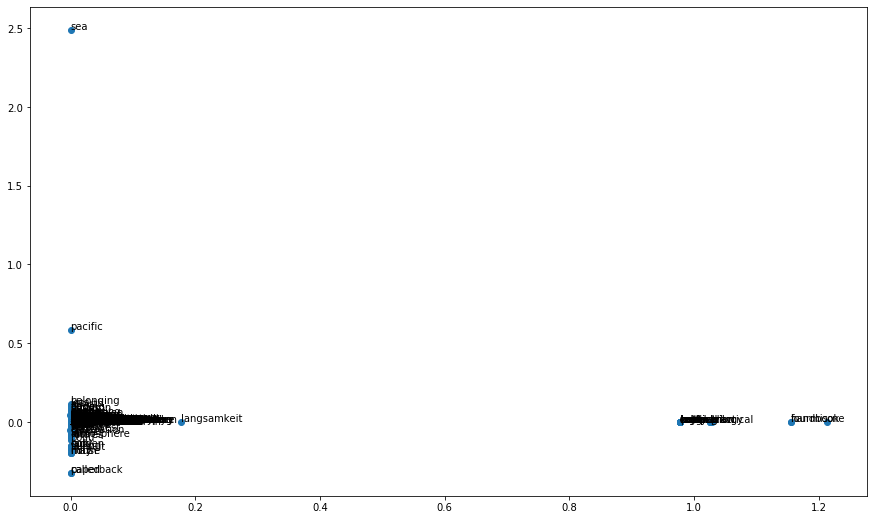

In [49]:
fig = plt.figure(figsize=(15, 9))
plt.scatter(Z[:, 0], Z[:, 1])

for i in range(len(word_2_int)):
    plt.annotate(int_2_words[i], (Z[i, 0], Z[i, 1]))

## DICTIONARY

##### AUTOENCODERS
Autoencoders are a special type of neural network which just tries to produce the output, the same as the input. 
This means the input we are feeding the network is the utput we are expecting from that network. Autoencoders are **also used in the dimensionality reduction** use case.

##### BATCH NORMALIZATION

Method used to make artificial neural networks **faster and more stable** through normalization of the layers' inputs by re-centering and re-scaling.

##### BINARY CROSS-ENTROPY

Binary cross entropy **compares each of the predicted probabilities to actual class output which can be either 0 or 1**. It then calculates the score that penalizes the probabilities based on the distance from the expected value.

##### !!! BOOSTING
In machine learning, boosting is an **ensemblelearning algorithm** for primarily **reducing bias, and also variance** in **supervised** learning, and a family of machine learning algorithms that convert wak learners to sstrong ones.

It sees for data points that were incorrectly classified in the previous learner and assign a higher probability to these data points for getting picked in the next learner so that the next learner can properly learn about that data point and in this way we are combining different weak learners to create one strong learner.

##### !!! C PARAMETER IN SVM

C is a hyperparameter that is set prior to train an SVM model.

**C controls the error rate**. High C means high error, low C means low errr.

But that doesn't mean that the low C SVM model always gives the best results because that model may not generalize well.

##### CATEGORICAL CROSS-ENTROPY

**Loss function that is used in multi-class classification tasks**.

These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one. Formally, it is designed to qualify the difference between two probability distributions.

##### CHECKPOINT

Checkpoint is a callback used while training the model in Keras. It keeps on saving the model after every epoch and also saves the best model.

##### CLASSIFICATION
Classification is that type of problem in which we have discrete output classes. The output can not be in continuous numerical form. Examples of a classification model are given height and weight to predict whether it is a dog or horse.

##### CONTENT BASED FILTERING

In content-based filtering recommender systems, the recommendations are made on the basis of similarity between the ites and not on the basis of user behaviour.

##### !!! CONVOLUTION NEURAL NETWORKS

In deep learning, a convolutional neural network i a class of artificial neural networks, most commonly applied to analyze ciual imagery. As the name suggests it performs the convolution operation on the images and extracts useful information out of them.

##### CORRELATION

Correlation refers to **linear relationship between 2 variables**. Correlation can be both positive and negative. A **positive relationship** means if one variable is going in one direction, other is also going in the same direction.

A **negative correlation** means if one variable is going in one direction, the other is going in the opposite direction.

##### DATA AUGUMENTATION 

Is an operation that helps us to enlarge our images dataset by performing some operations on our images. Some of the widely used operations are **rotation, shearing, zooming, horizontal flipping, vertical flipping, etc.**

##### DECISION TREE

**Flowchart like structure in which each internal node represents a "test" on an attribute** (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

It's used for both Classification and Regression problems.

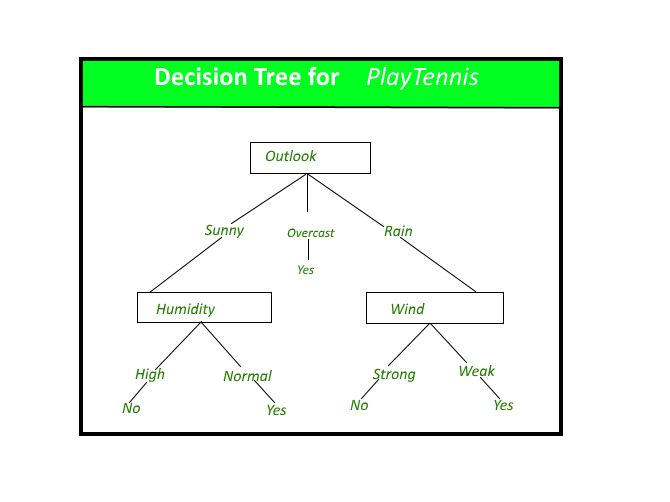

##### DEEP LEARNING 

Type of machine learning and artificial intelligence that imitates the way humans gain certain types of knowledge.

While traditional machine learning algorithms are linear, deep learning algorithms are stacked in a hierarchy of increating complexity.

Its name came from the fact that these networks are really very deep, containing 10, 20, 30 or even more hidden layers of neurons.

##### EARLYSTOPPING

Early stpping is a method tat allows you to specify an arbitrary large number of training epochs and **stop training once the model performance stops improving on the validation dataset.** We can also define patience in Earlystopping, which says that wait for, e.g. 3 epochs before stopping.

##### DUMMY VARIABLES

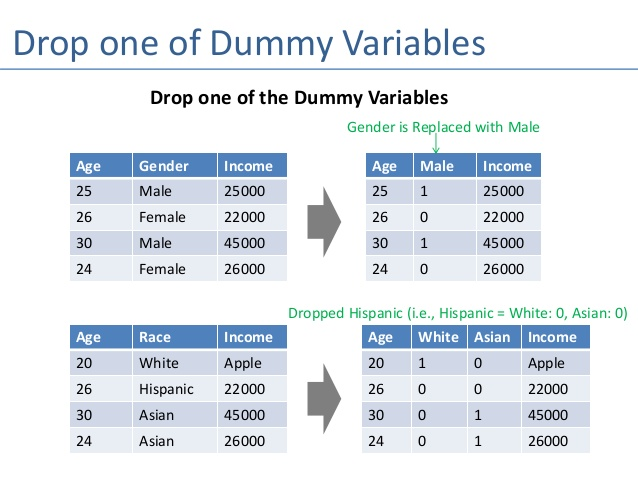

##### EMBEDDINGS

Just a fancy name for a **vector in an n-dimensional space**.

In ML Embeddings play a very vital role. While doing NLP we often need to convert words into Embeddings to check for their dependencies or similarities with other words. Whie ding Computer Visio also we need to convert image features from CNN layers to embeddings for finding similarities.

**Cosine similarity is the most widely used similarity function.**

##### COSINE SIMILARITY
Cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vwctors divided by the product of the two vectors' lengths (or magnitudes).

##### ENTROPY

Entropy basically **tells us about the randomness in the data**.

Higher the entropy, the higher the randomness. Entropy is basically used in building Decision Trees using the ID3 algorithm.

##### EXPLODING GRADIENT

Exploding gradients are a problem where **large error gradients accumulate and result in very large updates** to neural network model weights during training.

This has the effect of your model is unstable and unable to learn from your training data.

##### VANISHING GRADIENT

Problem that appears in very deep neutral networks.

In this problem very small values (,1) keep on multiplying with each other during the backpropagation phase while updating the weights and biases, and in the initial layers of the network these values become almost 0.

##### R-CNN
- they use Selective Search
- an extra region proposal network is required which porpoises (obejmuje) 2000 region,
- all those 2000 regions are then passed through a network for classification
- that network uses CNN for feature extraction and SVM for classification
- R-CNN is very slow due to that extra Region Proposal Network

##### FAST R-CNN
- advanced version of R-CNN and was comparatively faster,
- uses Selective Seach but that extra Region Proposal Network is removed,
- image is directly being fed to the CNN and selective search was used in the produced filters to propose regions

##### FASTER R-CNN
- removed Selective Search method
- it is very fast and can be used in real-time
- a separate network was used for region proposals

##### FINE TUNING

1. Remove the fully connected nodes at the end of the network
2. Replace the fully connected ndes with freshly initialized ones.
3. Freeze earlier CONV layers earlier in the network (ensuring that any previous robust features leanrt by the CNN are not destroyed).
4. Start training, **but only train the FC layer heads**.
5. Optionally unfreeze some/all of the CONV layers in the network and perform a second pas of training.

##### GRADIENT DESCENT

First-order iterative optimization algorithm for finsing a local minimum of a differentiable functin. **The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent.**

##### HSV color space

Hue, Saturation, Value color is also very widely used. It is basically used when we want the rnge of the colours.

##### HYPERPARAMETERS
- learning rate
- decay rate
- epochs
- batch size
- momentum coefficient

##### IMAGE PROCESSING

Computer technology applied to images that help us process, analyze and extract useful information from images which most of the time are further used in Computer Vision use cases. 

Some of the widely used Image Processing operations are:
- Blurring
- Thresholding
- Edge detection
- grayscaling

##### KERNEL IN SVM
Used to take data (that are non-linearly separable) into higher dimensions.

##### KMEANS

**Unsupervised learning clustering algorithm**, which when given some data tries to cluster it in K clusters in the best way possible, so as the minimize the within the sum of squares.

**Thi within the sum of squares is the sum of squares of the distance between cluster center and data points**.

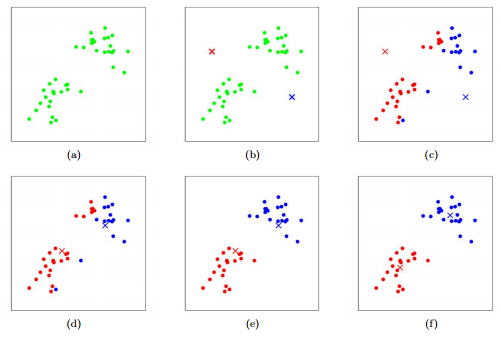

##### K NEAREST NEIGHBORS

KNN is a supervised learning algorithm.

**It is a lazy algorithm** which means it does not learn any discriminate function while the training phase.

At the time of predicition, when we give it a data point and ask it to predict its class, it will just see for the nearest K values (K values is passed by the user while training process) and will return the majority value as the prediction.

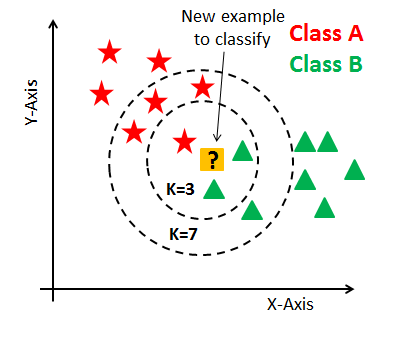

##### LASSO REGRESSION (L1 REGULARIZATION)

In lasso regression we add an extra term to our cost function which is **Lambda * (sum of Absolute values of magnitudes of weights)**.

In thi way, if any waight value becomes very high (overfitting happens in thi case), our total cost also increases, and hence in this way we prevent our model from overfitting.

It is also called L1 regularization. We have one more type of regularization, which is widely used and that is **Ridge Regression or L2 regularization**.

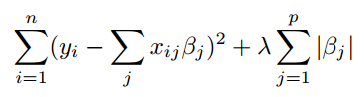

##### RIDGE REGRESSION (L2 REGULARIZATION)

In Ridge regression, we add an extra term to our Cost Function which is **Lambda * (sum of square of Absolute values of magnitudes of weights)**.

In this way if any weight value becomes very high (overfitting hapenninh happens in this case), our total cost also increases, and hence in this way we prevent our model from overfitting.

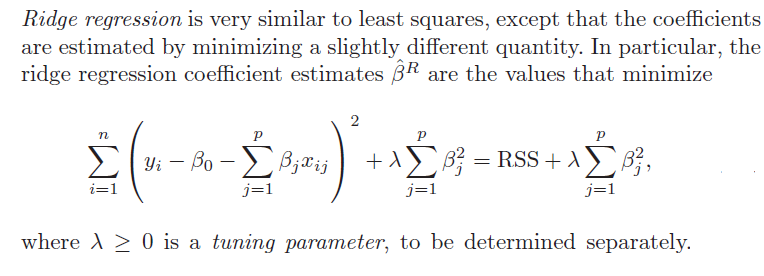

##### LOGISTIC REGRESSION

Logistic regression is a **supervised learning binary classification algorithm used to predict the probability of a target variable**.

It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection, etc.

It can also be thought of as the classification version of Linear Regression that uses a special S-shaped curve known as the sigmoid function.

##### N-FOLD-CROSS-VALIDATION

Technique that we ue when we are available with **comparatively small datasets**.

Suppose we have 1100 data points and we want to train our model on that. 

**Out of those 1100, we will keep 100 for testing purposes and 1000 for training and validation purposes.**

Now, let's divide these 1000 data points into 10 groups of 100 each.

Now, what we will do is we will keep the 1st chunk of 100 for validation and we will train our model on the other 9 chunks.

Th second time we will do is, we will keep 2nd chunk for validation and the other 9 for training and we will keep on moving like this. In this case, N was 10.

##### NAIVE BAYES

**One of the fastest and easiest ML algorithms to predict a class of datasets**.

It can be used for Binary as well as Multi-class Classifications.

It performs well in Multi-class predictions as compared to the  other algorithms.

**The most popular choice for text classification problems**.

**The naive assumtion: it assumes that every feature is independent of each other**.

##### NAMED ENTITY RECOGNITION

Subtask of information extraction that seeks to locate and classify named entities mentioned in unstructured text into predefined categories, such as person names,organizations, locations, medical codes, time expressions, quantities, monetary values, percentages, etc.

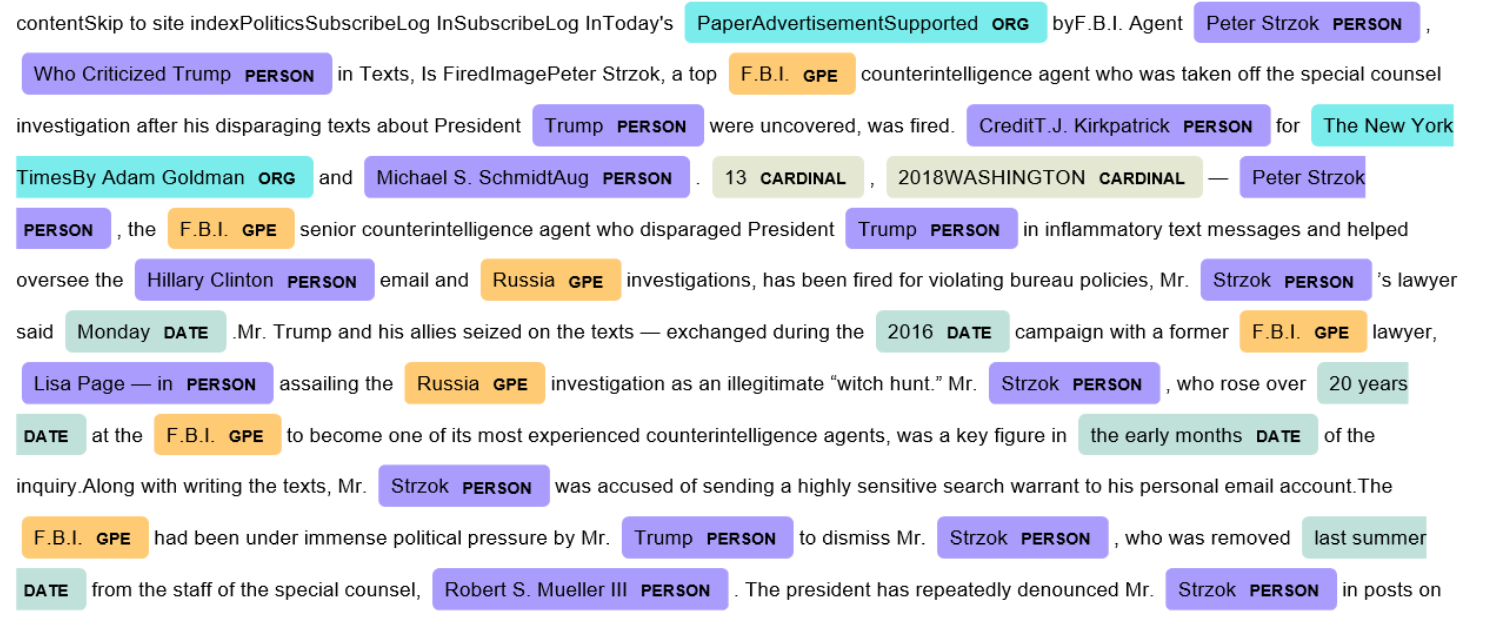

##### NORMALIZATION

Technique often applied as a part of data preparation for ML.

The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

# NORMALIZATION VS REGULARIZATION
Normalization:
- changes values in columns (ogarnia gradient descent, żeby był w miarę wyrównany)

Regularization:
- L1 regularization - penalizes the cost function
- helps to avoid overfitting

##### PIPELINE

Pipeline is a way to codify and automate the workflow it takes to produce a machine learning model.

ML pipelines consist of multiple sequential steps, that do everything from data extraction and preprocessing to model training and deployment.

In simple words, we can say that pipelining is putting many operations in sequence after one another to get some final results.

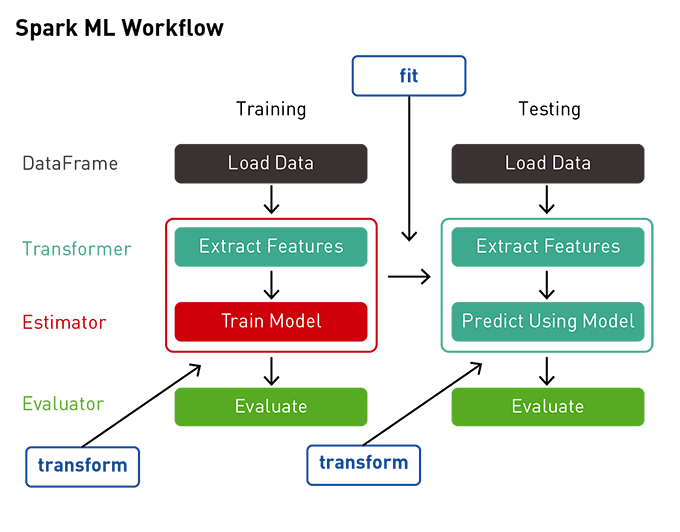

##### POOLING

Pooling is nothins but simpy downsampling an image.

Aa basic 2X2 filter with a stride of 2 can reduce 75% of the image data.

Most of the times pooling is used after a CONV layer.

##### PRECISION

Let's consider 2 classes - Yes and No. Precision tells that out of all predicted Yes, how many were real Yes.

##### RECALL
Let's consider 2 classes - Yes and No. Recall tells that out of actual Yes, how many were correctly predicted.

##### PRINCIPAL COMPONENT ANALYSIS

PCA is a linear dimensionality reduction algorithm.

Linear Regression plots a line of best fit in only one direction while PCA plots various orthogonal lines of best fit to the data explain maximum possible variance.

##### RANDOM FOREST

**ML technique that's used to solve regrgession and classification problems.**

It utilizes ensemble learning, which is a technique that combines many classifiers to provide solutions to complex problems.

A random forest algorithm consists of many decision trees.

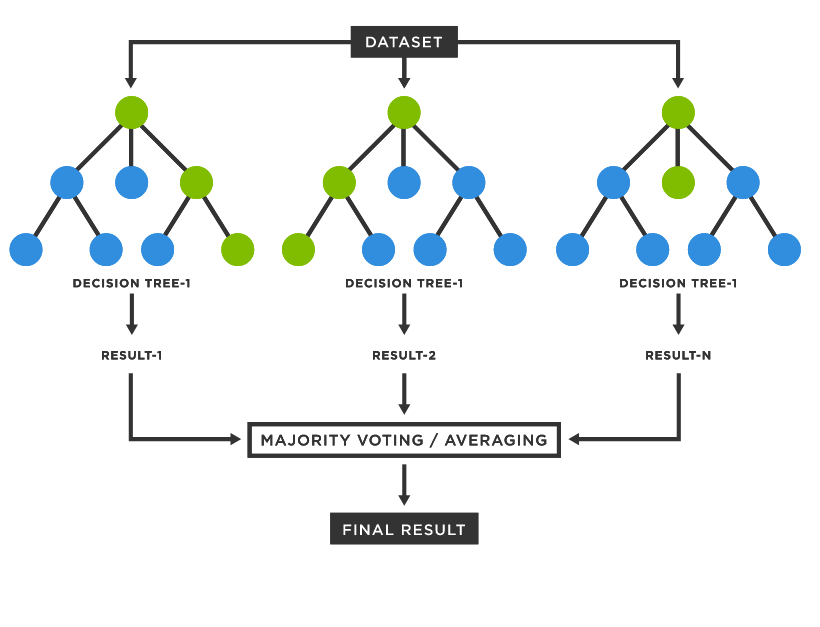

##### RECURRENT NEURAL NETWORKS

**Type of artificial neural network commonly used in speech recognition and NLP.**

Recurrent neural networks recognize data's sequential characteristics and use patterns to predict the next likely scenario.

##### REINFORCEMENT LEARNING

Reinforcement learning is a **machine learning training method** based on rewarding desired behaviours and/or pushing undesired ones.

In general, a reinforcement learning agent is able to perceive and interpret its environment, take actions and learn through trial and error.

##### SENSITIVITY

True Positive Rate

refers to the proportion of those who received a positive result on thi test out og those, who actually have the consition.

Measure of how well a test can identify true positives.

##### SPECIFICITY
True Negative Rate

refers to the proportion of those who received a negative result on this test out of those who do not actually have the condition.

Specifity is a measure of how well a test can identify true negatives.

##### SEGMENTATION

The basic idea behind segmentation is to divide images into different segments.

In Computer Vision, the goal is to recognize and understanf what's in the image at the pixel level.

Mask R-CNN is a **Convolutional Neural Network** (CNN) and state of the in terms of image segmentation.

This variant of a Deep Neural Network detects objects in an immage and generates a high-quiality segmentation mask for each instance.

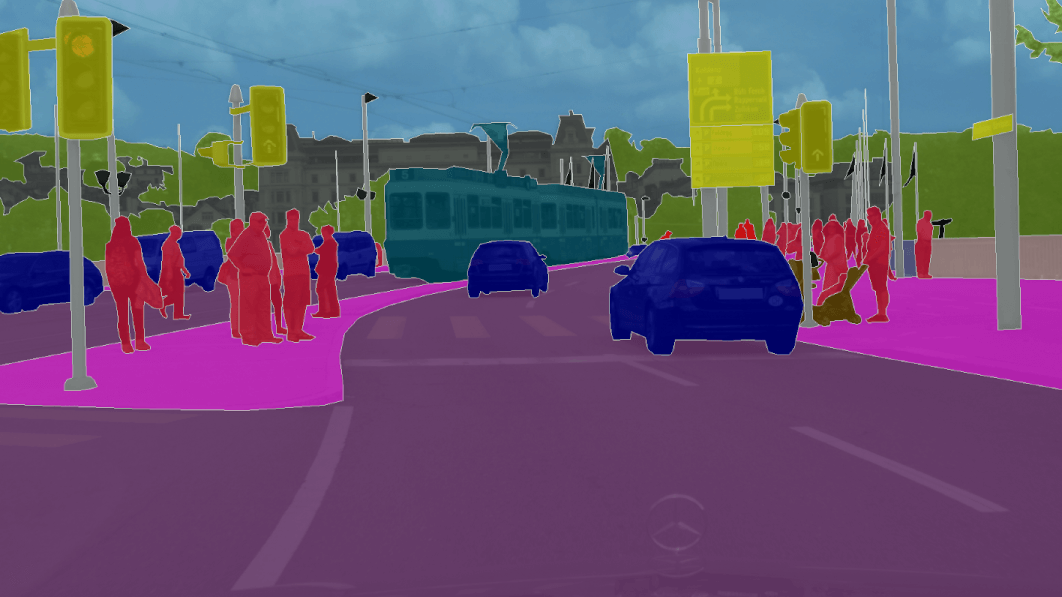

##### SINGLE SHOT DETECTION

A single shot detection like YOLO takes only one shot to detect multiple obejcts present in an image using a multibox.

It is significantly faster in speed and high-accuracy object detection algorithm.

The high speed and accuracy of SSD using relatively low-resolution images are attributed due to the following process:

- emilinates bounding box proposals like the ones used in RCNNs
- includes a progressively decreasing convolutional filter for predicting object categories and offsets in bounding box locations

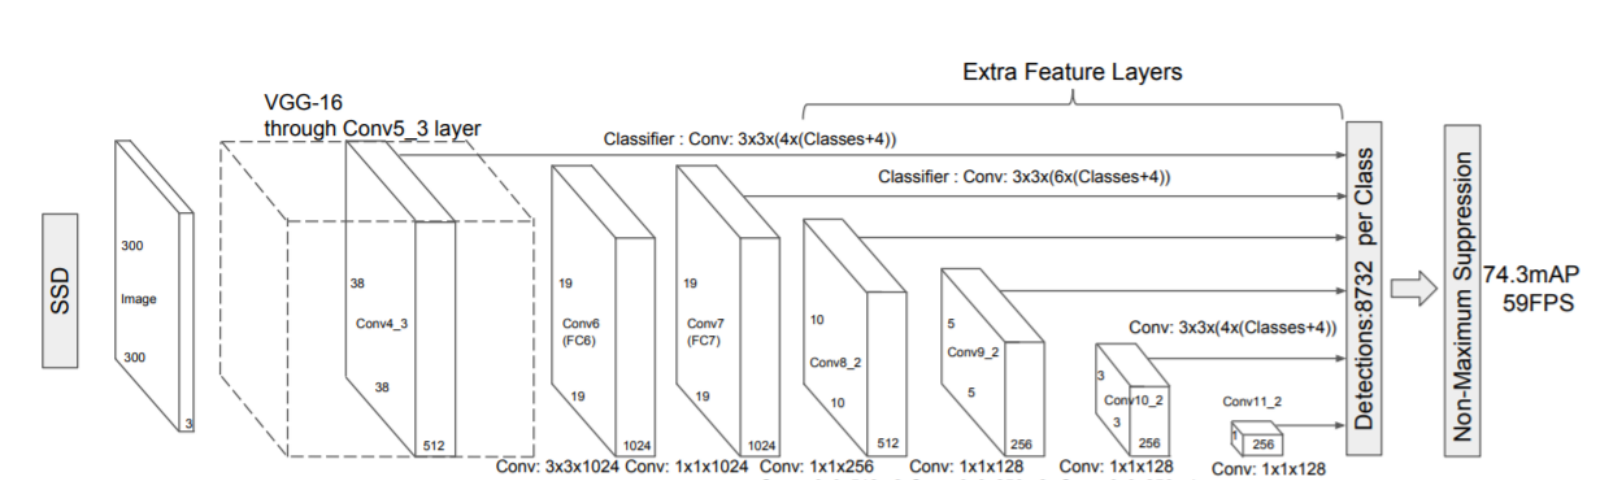

##### STANDARIZATION

Operation in which we transform our data in such a way that its mean becomes 0 and standard deviation becomees 1

##### SUPPORTED VECTOR MACHINES

SVM is a supervised binary classification algorithm.

**It basically tries to draw a hyperplane between the two classes, so as to maximize the margins between them a much as possible**.

Whenever a new data point comes it sees on which side of the hyperplane is the data point falling again and according to that it assigns it a class.

##### TOKENIZATION

Splits a sentence into a list of words.

For example, the sentence *I am a good boy* when we tokenize it, it becomes ['I', 'am', 'a', 'good', 'boy' ]. 

##### UNDERFITTING

A scenario in data science, where a data model is **unable to capture the relationship between the input and output variables accurately**, generating a high error rate on both the training set and test set.

##### XGBoost

Extreeme Gradient Boosting is an implementation of gradient boosted decision trees designed for speed and performance. Some of the main features of XGBoost are:
- **Parallelizatioon** of tree construction using all of your CPU cores during training,
- **Distributed Computing** for training very large models using a cluster of machines
- **Out 